# Get data cube values at given locations

Get the value from all data cube dimensions at the species occurrence location.
-------
v0.1: First version, Maria Ricci 

In [31]:
import xarray as xr
import rioxarray as rxr
from glob import glob

In [32]:
# load cube

path = "<change>/f02_luxembourg_data/f02_raster_10m_collection/*.tif"
layers = glob(path)
da_list = []
for layer in layers:
    name = layer.split(sep='\\r')[-1].split('.')[0]
    print(name)
    da = rxr.open_rasterio(filename=layer, default_name=name) # type: ignore
    da_list.append(da)
da_list[0]


00_admin_quartiers_10m
01_admin_commune_10m
02_land_use_07_15_18_21_10m_16int
03_soil_map_10m
04_protected_areas_v21_2023_10m
05_dhmtc0121_10m_LUREF_meter
06_lc_18_21_10m
07_cadaster_vdl_public_private_layer_10m
08_slope_dhmtc0121_10m_LUREF_meter
09_aspect_dhmtc0121_10m_LUREF_meter
10_public_forests_vdl


<xarray.DataArray '00_admin_quartiers_10m' (band: 1, y: 1044, x: 972)>
[1014768 values with dtype=int32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 7.286e+04 7.286e+04 ... 8.256e+04 8.256e+04
  * y            (y) float64 8.002e+04 8.002e+04 8e+04 ... 6.96e+04 6.96e+04
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        27
    STATISTICS_MEAN:           12.896565251504
    STATISTICS_MINIMUM:        1
    STATISTICS_STDDEV:         7.1531789575025
    STATISTICS_VALID_PERCENT:  49.17
    _FillValue:                0
    scale_factor:              1.0
    add_offset:                0.0

In [72]:
da_list[6]

<xarray.DataArray '06_lc_18_21_10m' (band: 2, y: 1044, x: 971)>
[2027448 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2
  * x            (x) float64 7.286e+04 7.287e+04 ... 8.255e+04 8.256e+04
  * y            (y) float64 8.003e+04 8.002e+04 ... 6.961e+04 6.96e+04
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        255
    STATISTICS_MEAN:           31.725237777912
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         68.161503789851
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0

In [66]:
ds = xr.Dataset({'admin': da_list[1],
                 'lu': da_list[2],
                 'soil': da_list[3],
                 'protected_areas': da_list[4],
                 'dem': da_list[5],
                #  'lc': da_list[6],
                 'public_land': da_list[7],
                 'slope': da_list[8],
                 'aspect': da_list[9],
                 'public_forest': da_list[10]})

In [55]:
ds

<xarray.Dataset>
Dimensions:          (band: 4, x: 1943, y: 2088)
Coordinates:
  * band             (band) int32 1 2 3 4
  * x                (x) float64 7.286e+04 7.286e+04 ... 8.256e+04 8.256e+04
  * y                (y) float64 6.96e+04 6.96e+04 ... 8.002e+04 8.003e+04
    spatial_ref      int32 0
Data variables:
    admin            (band, y, x) float64 0.0 nan 0.0 nan ... nan nan nan nan
    lu               (band, y, x) float64 0.0 nan 0.0 nan ... nan nan nan nan
    soil             (band, y, x) float64 0.0 nan 0.0 nan ... nan nan nan nan
    protected_areas  (band, y, x) float64 0.0 nan 0.0 nan ... nan nan nan nan
    dem              (band, y, x) float32 322.0 nan 322.0 nan ... nan nan nan
    lc               (band, y, x) float64 nan nan nan nan ... nan nan nan nan
    public_land      (band, y, x) float64 1.0 nan 1.0 nan ... nan nan nan nan
    slope            (band, y, x) float32 5.711 nan 5.711 nan ... nan nan nan
    aspect           (band, y, x) float32 180.0 nan 180.0 nan ... nan nan nan
    public_forest    (band, y, x) float64 -1.0 nan -1.0 nan ... nan nan nan nan

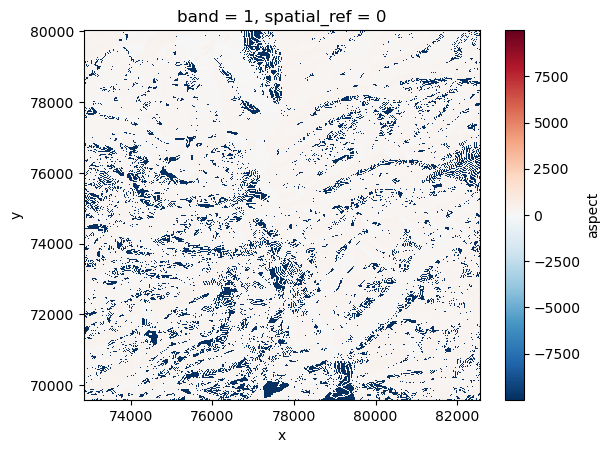

In [73]:
ds.aspect.sel(band=1).plot()

In [35]:
# load point data
import pandas as pd


In [36]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [37]:
%sql --section fairicube

Connecting to 'fairicube'

In [38]:
%sqlcmd tables --schema luxembourg_species

Name
neophytes_list
neophytes_geometry_raw
neophytes_geometry_description
luxembourg_species_description
neophytes_geometry
all_species
neophytes_list_gbif
all_species_neophytes


In [39]:
%sqlcmd columns --table neophytes_geometry --schema luxembourg_species

c:\Users\MariaRicci\.conda\envs\fairicube_env\lib\site-packages\sql\inspect.py:185: SAWarning: Did not recognize type 'geometry' of column 'geometry'
  columns = inspector.get_columns(name, schema) or []


name,type,nullable,default,autoincrement,comment
gbif_key,BIGINT,True,None,False,None
species,TEXT,True,None,False,None
family,TEXT,True,None,False,None
species_name,TEXT,True,None,False,None
species_name_lower,TEXT,True,None,False,None
observation_key,TEXT,True,None,False,None
date_start,DATE,True,None,False,None
date_end,DATE,True,None,False,None
sample_date,DATE,True,None,False,None
taxon_kingdom,TEXT,True,None,False,None


In [40]:
df = %sql SELECT gbif_key, species, sample_date, x_epsg2169, y_epsg2169 FROM luxembourg_species.neophytes_geometry
#WHERE sample_date IS NOT NULL
df = df.DataFrame()

Running query in 'fairicube'

2904 rows affected.

In [41]:
df.sample_date

0       2023-12-31
1       2023-12-31
2       2019-08-31
3       2019-08-31
4       2023-07-31
           ...    
2899    1955-09-13
2900    1952-12-31
2901    1952-12-31
2902    1883-06-30
2903    1883-06-30
Name: sample_date, Length: 2904, dtype: object

In [42]:
df['sample_year'] = df['sample_date'].apply(lambda x: x.year)

In [70]:
# query the cube - one point
ds.sel(x = 77432, y = 74940, method='nearest').to_dataframe()

,x,y,spatial_ref,admin,lu,soil,protected_areas,dem,public_land,slope,aspect,public_forest
band,,,,,,,,,,,,
1,77435.0,74945.0,0,75.0,115,30.0,0.0,297.0,1.0,3.035724,225.0,-1.0
2,77435.0,74945.0,0,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77435.0,74945.0,0,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77435.0,74945.0,0,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# query data cube -- list of points
x_coords = xr.DataArray(df.x_epsg2169)
y_coords = xr.DataArray(df.y_epsg2169)
ds.sel(x = x_coords, y = y_coords, method='nearest').to_dataframe()

x        y  spatial_ref  admin   lu  soil  protected_areas  \
band dim_0                                                                     
1    0      78315.0  73145.0            0   61.0  612  30.0              0.0   
     1      78315.0  73145.0            0   61.0  612  30.0              0.0   
     2      77465.0  75985.0            0   75.0  313  30.0              0.0   
     3      77465.0  75985.0            0   75.0  313  30.0              0.0   
     4      78515.0  75525.0            0   35.0  313  30.0              0.0   
...             ...      ...          ...    ...  ...   ...              ...   
4    2899   80995.0  74015.0            0    NaN    0   NaN              NaN   
     2900   77665.0  74815.0            0    NaN  612   NaN              NaN   
     2901   77665.0  74815.0            0    NaN  612   NaN              NaN   
     2902   78995.0  75005.0            0    NaN  220   NaN              NaN   
     2903   78995.0  75005.0            0    NaN  220   NaN              NaN   

              dem  public_land      slope      aspect  public_forest  
band dim_0                                                            
1    0      291.0          1.0   3.199601  296.565033           -1.0  
     1      291.0          1.0   3.199601  296.565033           -1.0  
     2      270.0          2.0  30.108191  277.431396           -1.0  
     3      270.0          2.0  30.108191  277.431396           -1.0  
     4      315.0          2.0  26.217613  293.962494           -1.0  
...           ...          ...        ...         ...            ...  
4    2899     NaN          NaN        NaN         NaN            NaN  
     2900     NaN          NaN        NaN         NaN            NaN  
     2901     NaN          NaN        NaN         NaN            NaN  
     2902     NaN          NaN        NaN         NaN            NaN  
     2903     NaN          NaN        NaN         NaN            NaN  

[11616 rows x 12 columns]

In [46]:
# save to database
# TODO